In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import zipfile as zf
files=zf.ZipFile("/content/drive/MyDrive/yolov4/datasoot.zip","r")
files.extractall("VGG16")
files.close()

In [3]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

In [4]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
rm -rf "VGG16/val"

In [5]:
import splitfolders
splitfolders.ratio("VGG16", output="output", seed=1337, ratio=(0.8, 0.2))

Copying files: 1012 files [00:00, 3739.21 files/s]


In [6]:
# loading the directories 
training_dir = '/content/output/train'
validation_dir = '/content/output/val'
test_dir = '/content/output/test'

In [7]:
#for getting number of files
image_files = glob(training_dir + '/*/*.jp*g')
valid_image_files = glob(validation_dir + '/*/*.jp*g')

In [8]:
# getting the number of classes 
folders = glob(training_dir + '/*')
num_classes = len(folders)
print ('Total Classes = ' + str(num_classes))

Total Classes = 4


In [9]:
# importing the libraries
from keras.models import Model
from keras.layers import Flatten, Dense
from keras import applications
from tensorflow.keras.applications import  VGG16


IMAGE_SIZE = [64, 64] 
vgg = VGG16(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False)  
for layer in vgg.layers:
    layer.trainable = False

x = Flatten()(vgg.output)
#x = Dense(128, activation = 'relu')(x)  
x = Dense(num_classes, activation = 'softmax')(x) 

model = Model(inputs = vgg.input, outputs = x)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#test_loss, test_acc =   model.evaluate()

58900480/58889256 [==============================] - 0s 0us/step


In [10]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [ ]:
import tensorflow as tf

tf.keras.utils.plot_model(model, show_shapes=True, show_layer_activations=True, show_dtype=True, show_layer_names= True, to_file= 'model.png', dpi=90)

In [12]:
# Image Augmentation

from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input

training_datagen = ImageDataGenerator(
                                    rescale=1./255,   
                                    shear_range=0.2, 
                                    zoom_range=0.2,rotation_range=20,
                                    horizontal_flip=True,
                                    preprocessing_function=preprocess_input)

validation_datagen = ImageDataGenerator(rescale = 1./255, preprocessing_function=preprocess_input)

training_generator = training_datagen.flow_from_directory(training_dir, target_size = IMAGE_SIZE, batch_size = 32, class_mode = 'categorical')
validation_generator = validation_datagen.flow_from_directory(validation_dir, target_size = IMAGE_SIZE, batch_size = 32, class_mode = 'categorical')

Found 808 images belonging to 4 classes.
Found 204 images belonging to 4 classes.


In [13]:
training_generator.class_indices

{'apple': 0, 'banana': 1, 'rotten_apple': 2, 'rotten_banana': 3}

In [14]:
batch_size = 32
history = model.fit(training_generator,
                   steps_per_epoch = (808/batch_size),  
                   epochs = 50,  
                   validation_data = validation_generator,
                   validation_steps = (204/batch_size))  #

                 

Epoch 1/50
25/25 [==============================] - 19s 228ms/step - loss: 0.9264 - accuracy: 0.6844 - val_loss: 0.4682 - val_accuracy: 0.8725
Epoch 2/50
25/25 [==============================] - 5s 184ms/step - loss: 0.3777 - accuracy: 0.8861 - val_loss: 0.2854 - val_accuracy: 0.9167
Epoch 3/50
25/25 [==============================] - 5s 183ms/step - loss: 0.2602 - accuracy: 0.9257 - val_loss: 0.2380 - val_accuracy: 0.9118
Epoch 4/50
25/25 [==============================] - 5s 183ms/step - loss: 0.2150 - accuracy: 0.9394 - val_loss: 0.1909 - val_accuracy: 0.9510
Epoch 5/50
25/25 [==============================] - 5s 185ms/step - loss: 0.1936 - accuracy: 0.9505 - val_loss: 0.1623 - val_accuracy: 0.9608
Epoch 6/50
25/25 [==============================] - 5s 184ms/step - loss: 0.1717 - accuracy: 0.9517 - val_loss: 0.1516 - val_accuracy: 0.9559
Epoch 7/50
25/25 [==============================] - 5s 184ms/step - loss: 0.1394 - accuracy: 0.9629 - val_loss: 0.1375 - val_accuracy: 0.9608
Epoch

In [ ]:
print ('Training Accuracy = ' + str(history.history['accuracy']))
print ('Validation Accuracy = ' + str(history.history['val_accuracy']))


Training Accuracy = [0.6757425665855408, 0.9282178282737732, 0.9319307208061218, 0.9467821717262268, 0.9504950642585754, 0.9517326951026917, 0.969059407711029, 0.9628713130950928, 0.9603960514068604, 0.9702970385551453, 0.969059407711029, 0.9752475023269653, 0.9603960514068604, 0.9715346693992615, 0.969059407711029, 0.9752475023269653, 0.9801980257034302, 0.9826732873916626, 0.9764851331710815, 0.9752475023269653, 0.9826732873916626, 0.9925742745399475, 0.9801980257034302, 0.9826732873916626, 0.9814356565475464, 0.9801980257034302, 0.9863861203193665, 0.9876237511634827, 0.9814356565475464, 0.9839109182357788, 0.9814356565475464, 0.9888613820075989, 0.9876237511634827, 0.9900990128517151, 0.9851484894752502, 0.9851484894752502, 0.9888613820075989, 0.9876237511634827, 0.9900990128517151, 0.9888613820075989, 0.9938119053840637, 0.9888613820075989, 0.9876237511634827, 0.9913366436958313, 0.9938119053840637, 0.9900990128517151, 0.9925742745399475, 0.9900990128517151, 0.9888613820075989, 0.

In [15]:
hist= history.history

Text(0, 0.5, 'accuracy')

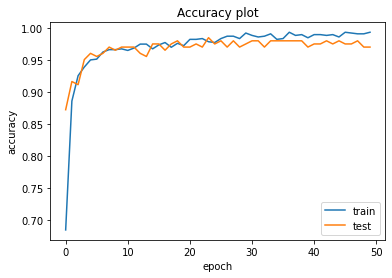

In [16]:
plt.plot(hist["accuracy"])
plt.plot(hist["val_accuracy"])
plt.title("Accuracy plot")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("accuracy")

Text(0, 0.5, 'loss')

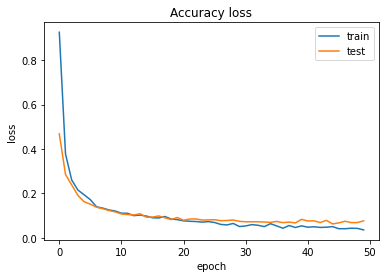

In [17]:
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.title("Accuracy loss")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("loss")

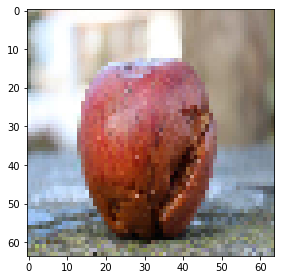

In [20]:
#from cv2 import imread
#from google.colab.patches import cv2_imshow
#yes_path = test_path+"/mango/"+os.listdir(test_path+"/mango/")[9]
#path = r'https://drive.google.com/file/d/1WI9DDcsd-ZlxZGbBM4oIFXLWhQ2UsYdh/view?usp=sharing'

#img = cv2.imread(path,0)
#tumour = imread(yes_path)
#image_resized= cv2.resize(tumour, (331 ,331))
#image=np.expand_dims(image_resized,axis=0)
#plt.imshow(tumour)
#cv2.imshow(img)

#%matplotlib inline
#The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook

import cv2
from skimage import io
from matplotlib import pyplot as plt

#Import image
#image_resized= cv2.resize("/content/IMG_20210630_102834.jpg",(331 ,331))

image = io.imread("/content/kharap_apol.jpg")
image_resized= cv2.resize(image,(64, 64))
image=np.expand_dims(image_resized,axis=0)

#Show the image with matplotlib
io.imshow(image_resized)
plt.show()

In [21]:
pred=model.predict(image)

output_class=[np.argmax(pred)]
print("The predicted class is", output_class)


The predicted class is [2]
